In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/df_flight_weather_3.csv', index_col=0)

In [4]:
#print unique day_of_year, count
print(df['day_of_year'].value_counts())

191    16438
208    16436
198    16388
205    16387
218    16377
       ...  
325    11402
52     11391
59     11261
32     10990
330     9790
Name: day_of_year, Length: 333, dtype: int64


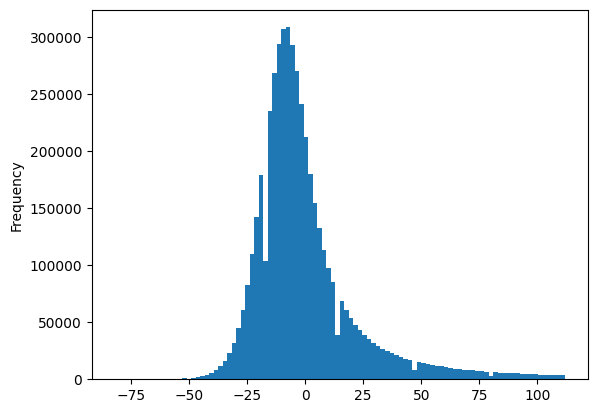

In [19]:
#keep only 3 sigma values of ARRIVAL_DELAY
from matplotlib import pyplot as plt


df = df[(df['ARRIVAL_DELAY'] < 3*df['ARRIVAL_DELAY'].std()) & (df['ARRIVAL_DELAY'] > -3*df['ARRIVAL_DELAY'].std())]
#then plot the distribution, save png
df['ARRIVAL_DELAY'].plot(kind='hist', bins=100)
plt.savefig('arrival_delay_hist.png')


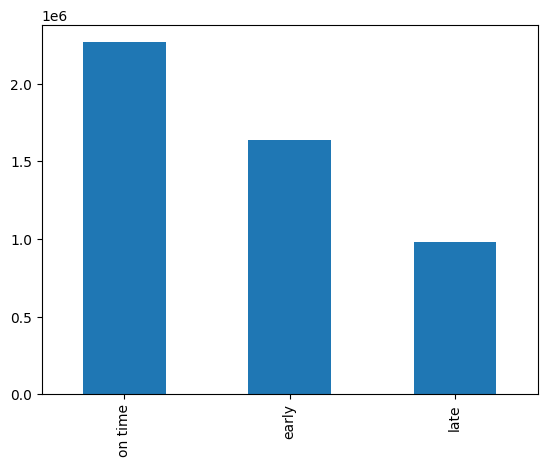

In [20]:
#split into 3 categories; early, on time, late
#make on time a +/- 10 min window
df['DELAY_CAT'] = df['ARRIVAL_DELAY'].apply(lambda x: 'early' if x < -10 else ('late' if x > 10 else 'on time'))

#then plot the distribution, save png
df['DELAY_CAT'].value_counts().plot(kind='bar')
plt.savefig('arrival_delay_bar.png')

In [11]:
# #if column 'DELAY_CAT' is not in the dataframe, create it
# if 'ARRIVAL_DELAY_CAT_2' not in df.columns:
#     df['DELAY_CAT'] = df['ARRIVAL_DELAY'].apply(lambda x: 'on' if x <= 0 else 'DELAYED')


In [3]:
#describe
describe = df.describe()
#add unique as a row to describe for each column
describe.loc['unique'] = df.nunique()
#add missing as a row to describe for each column
describe.loc['missing'] = df.isnull().sum()

print(describe)

                  DAY   DAY_OF_WEEK  DEPARTURE_DELAY      TAXI_OUT  \
count    4.979303e+06  4.979303e+06     4.979303e+06  4.979303e+06   
mean     1.572631e+01  3.924207e+00     8.549582e+00  1.607052e+01   
std      8.743977e+00  1.991966e+00     3.497035e+01  8.920569e+00   
min      1.000000e+00  1.000000e+00    -8.200000e+01  1.000000e+00   
25%      8.000000e+00  2.000000e+00    -5.000000e+00  1.100000e+01   
50%      1.600000e+01  4.000000e+00    -2.000000e+00  1.400000e+01   
75%      2.300000e+01  6.000000e+00     7.000000e+00  1.900000e+01   
max      3.100000e+01  7.000000e+00     1.988000e+03  2.250000e+02   
unique   3.100000e+01  7.000000e+00     1.156000e+03  1.820000e+02   
missing  0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   

           WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME      AIR_TIME  \
count    4.979303e+06    4.979303e+06  4.979303e+06  4.979303e+06   
mean     1.331407e+03    1.392426e+02  1.344850e+02  1.109656e+02   
std      4.734987e+02 

In [5]:
#print columns
print(df.columns)

Index(['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'day_of_year',
       'time_of_day', 'day_ind', 'temp', 'wx_icon', 'icon_extd', 'dewPt',
       'heat_index', 'rh', 'pressure', 'vis', 'wc', 'wdir', 'wdir_cardinal',
       'wspd', 'precip_hrly', 'uv_desc', 'feels_like', 'uv_index',
       'wx_phrase_simple', 'time_of_day_dest', 'day_ind_dest', 'temp_dest',
       'wx_icon_dest', 'icon_extd_dest', 'dewPt_dest', 'heat_index_dest',
       'rh_dest', 'pressure_dest', 'vis_dest', 'wc_dest', 'wdir_dest',
       'wspd_dest', 'precip_hrly_dest', 'uv_desc_dest', 'feels_like_dest',
       'uv_index_dest', 'wx_phrase_simple_dest'],
      dtype='object')


In [9]:
#describe 'arrival_delay'
print(df['ARRIVAL_DELAY'].describe())
#add unique value count to describe
print(df['ARRIVAL_DELAY'].value_counts())

count    4.979303e+06
mean     3.792009e+00
std      3.751362e+01
min     -8.200000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      7.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64
-8.0       155228
-9.0       154347
-7.0       153659
-10.0      153336
-11.0      149972
            ...  
 1184.0         1
 991.0          1
 1199.0         1
 728.0          1
 1076.0         1
Name: ARRIVAL_DELAY, Length: 1176, dtype: int64


In [6]:
#for each column, plot the distribution of the values in folder ../plots/describe
#if folder does not exist, create it
import os
import matplotlib.pyplot as plt
if not os.path.exists('../plots/describe'):
    os.makedirs('../plots/describe')

#columns to ignore

for col in df.columns:
    #if not numeric, skip
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    df[col].plot.hist(bins=100)
    plt.title(col)
    plt.savefig('../plots/describe/' + col + '.png')
    plt.close()

In [7]:
#plot the correlation matrix
import seaborn as sns
corr = df.corr()

#plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.savefig('../plots/corr_matrix.png') 
plt.close()

C:\Users\tccox\AppData\Local\Temp\ipykernel_18828\2718213083.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [17]:
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition


In [24]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()

# Encode each categorical column using its respective LabelEncoder
for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])

# Verify that the categorical columns have been encoded
print(df.head())


       DAY  DAY_OF_WEEK  AIRLINE  ORIGIN_AIRPORT  DESTINATION_AIRPORT  \
MONTH                                                                   
1        2            5        3             176                  216   
1        2            5        0             174                  203   
1        2            5       11             239                   93   
1        2            5        3             285                   20   
1        2            5        3             276                  216   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  \
MONTH                                                                   
1                       32              56             24.0      17.0   
1                       34              37              3.0      17.0   
1                       39              41              2.0      12.0   
1                       39              40              1.0      14.0   
1                       39              34        

In [15]:
target :str = "DELAY_CAT"
ignore = [target, 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'DEPARTURE_TIME']
# 
# 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
#        'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
#        'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
#        'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
#        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'day_of_year',
#        'time_of_day', 'day_ind', 'temp', 'wx_icon', 'icon_extd', 'dewPt',
#        'heat_index', 'rh', 'pressure', 'vis', 'wc', 'wdir', 'wdir_cardinal',
#        'wspd', 'precip_hrly', 'uv_desc', 'feels_like', 'uv_index',
#        'wx_phrase_simple', 'time_of_day_dest', 'day_ind_dest', 'temp_dest',
#        'wx_icon_dest', 'icon_extd_dest', 'dewPt_dest', 'heat_index_dest',
#        'rh_dest', 'pressure_dest', 'vis_dest', 'wc_dest', 'wdir_dest',
#        'wspd_dest', 'precip_hrly_dest', 'uv_desc_dest', 'feels_like_dest',
#        'uv_index_dest', 'wx_phrase_simple_dest'],
# 

# Drop the target variable and any unnecessary columns
X = df.drop(ignore, axis=1)

# Scale the data to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Create a PCA object and specify the number of components
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(X_scaled)

# Transform the data to the lower-dimensional space
X_pca = pca.transform(X_scaled)


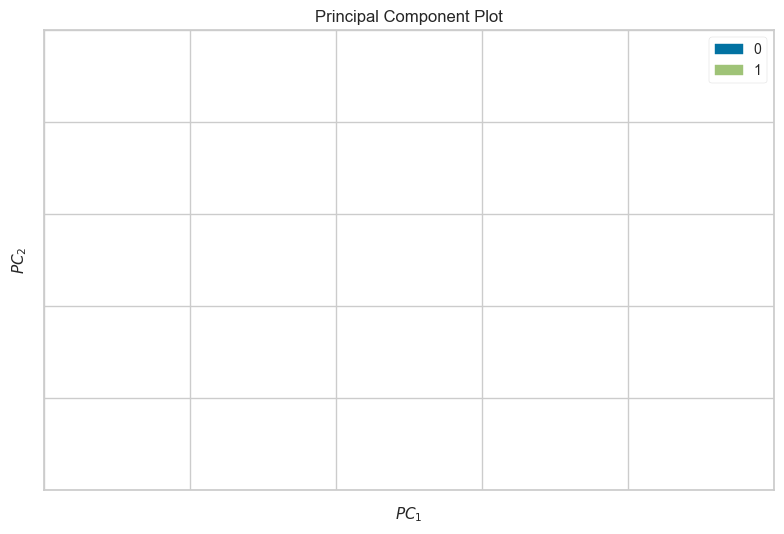

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [19]:
# Create a PCADecomposition visualizer
visualizer = PCADecomposition(scale=True, proj_features=True, proj_points=True)

# Fit the visualizer to the transformed data
visualizer.fit(X_pca, df[target])

# Plot the explained variance ratio for each principal component
visualizer.show()


In [22]:
target :str = "DELAY_CAT"
#features to remove 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'DEPARTURE_TIME'
features = df.columns.drop([target, 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'DEPARTURE_TIME'])


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9697668436527384


In [29]:
#neural network
from sklearn.neural_network import MLPClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a neural network classifier
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.9999292875567621


In [30]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 1.0


In [31]:

#knn
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a k-nearest neighbors classifier
clf = KNeighborsClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

In [26]:
#now make a new df without any of the weather data
df_no_weather = df.drop(['day_ind', 'temp', 'wx_icon', 'icon_extd', 'dewPt',
         'heat_index', 'rh', 'pressure', 'vis', 'wc', 'wdir', 'wdir_cardinal',
            'wspd', 'precip_hrly', 'uv_desc', 'feels_like', 'uv_index',
            'wx_phrase_simple', 'time_of_day_dest', 'day_ind_dest', 'temp_dest',
            'wx_icon_dest', 'icon_extd_dest', 'dewPt_dest', 'heat_index_dest',
            'rh_dest', 'pressure_dest', 'vis_dest', 'wc_dest', 'wdir_dest',
            'wspd_dest', 'precip_hrly_dest', 'uv_desc_dest', 'feels_like_dest',
            'uv_index_dest', 'wx_phrase_simple_dest'], axis=1)
#print columns
df_no_weather.columns


Index(['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'day_of_year',
       'time_of_day', 'DELAY_CAT'],
      dtype='object')

In [27]:
#update features
features = df_no_weather.columns.drop(target)
#predict with no weather data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_no_weather[features], df_no_weather[target], test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [28]:
#size of y_test
len(y_test)


975783

In [26]:
#print the distrubution of the target variable
df[target].value_counts()


1    3167899
0    1811404
Name: DELAY_CAT, dtype: int64

In [28]:
#loop through 5 classification models and print the accuracy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))


# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

c:\Users\tccox\Documents\OMSCS\CSE6242\flight-delay-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tccox\Documents\OMSCS\CSE6242\flight-delay-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

LR: 0.939767 (0.001764)
